In [1]:
# standard imports
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.analysis.structure_matcher import StructureMatcher

from basicimports import *

# The system path for the formation energy calculations
wd = home + 'formEox/2vac/'
print(
    "\nThe formation energy calculations for an oxygen vacancy are in the directory \n\t{}.\n\n"
    "The directories contents are \n\t{}".format(
        wd, ' '.join([x for x in os.listdir(wd)])))

Last ran on /home/tboland1/Dropbox/Crozier Group User- Tara Boland/pymatgen from 2019-02-27 12:07:13.556180. 

home is /home/tboland1/Dropbox/TaraB/DFT/

The formation energy calculations for an oxygen vacancy are in the directory 
	/home/tboland1/Dropbox/TaraB/DFT/formEox/2vac/.

The directories contents are 
	notes o_cf_5 o_cf_9 o_cf_7 o_cf_1 o_cf_4 o_cf_2 o_cf_6 o_cf_0 o_cf_3 o_cf_8


Understanding the influence of vacancies near & far from each respective vacancy is important for understanding how these vacancies will interact at higher concentrations of O$_{vac}$'s when dopant concentration is increased. These calculations lend insight to which vacancy configuration may be more energetically favorable than other configurations, hopefully providing insights on how to reduce the number of combinations of O$_{vac}$'s with some formal criteria for vacancy ordering.

In [2]:
# Use the 2x2x2 1 vac ceo2 as a reference lattice
ref_path = home +'formEox/1vac/vac_loc/ispin2/magmom/m2x1/39/'
ref_struct = (Poscar.from_file(filename=ref_path+"POSCAR").structure)
ref_lattice = ref_struct.lattice

Ran for 14 Seconds

In [9]:
# change just the Concentration ( enter total # of X you want to remove)
con_O = (64-2)/64
con_ref = 2/64
con_Ce = 1

# create generic ceria lattice
specie = [{"Ce4+": con_Ce}, {"O2-": con_O,"Be2-":con_ref}]
structure = Structure.from_spacegroup("Fm-3m", Lattice.cubic(5.494), specie,
                                      [[0, 0, 0], [0.25, 0.25, 0.25]])

# obtain a copy of the structure 
struct = structure.copy()
struct.make_supercell([2,2,2])

# load the transformer
from pymatgen.transformations.standard_transformations import \
OrderDisorderedStructureTransformation
odst = OrderDisorderedStructureTransformation()
#odst_structs = odst.apply_transformation(struct, return_ranked_list=1000000)
#print('There is a total of {} structure(s) created using the ODST.\n')
#      'The composition is {}.\n'.format(
#          len(odst_structs), odst_structs[0]['structure'].composition))

print('There is a total of 2016 structure(s) created using the ODST.'
      '\nThe composition is Ce4+32 Be2-2 O2-62.')

There is a total of 2016 structure(s) created using the ODST.
The composition is Ce4+32 Be2-2 O2-62.


### Pickled Variables
- solute O$_{vac}$ structs: matches
    - ../pkl/def_2vac_pure.pkl
- solute O$_{vac}$ structs: config_Struct_dict
    - ../pkl/def_2vac_pure_ConfigStructDict.pkl
    - all the configurations for the O$_{vac}$'s

Ran for 475 seconds

In [4]:
# remove duplicates
from pymatgen.analysis.structure_matcher import StructureMatcher
matcher = StructureMatcher()
# Group structs by their similarity

# load Pickled var to save time
'''matches = matcher.group_structures([d["structure"] for d in odst_structs])
with open("../pkl/def_2vac_pure.pkl", 'wb') as f:
    pickle.dump(matches,f)'''
with open("../pkl/def_2vac_pure.pkl", 'rb') as f:
    matches = pickle.load(f)

In [10]:
# collect # of groups, number frequency for each struct & disp data

# the grouping of all structures by structural uniquiness found
groups = [matches[i][0] for i in range(len(matches))]
# the total number of unique structures found
unique_count = len(groups)
# the frequency with which each unique structure occurres
num_freq =  [len(matches[i]) for i in range(len(matches))]
print("The total number of unique structures found is {}.\n"
       "The number frequency with which each structure occurres is \n\t {}.".format(
           unique_count, ' '.join([str(x) for x in num_freq])))

The total number of unique structures found is 10.
The number frequency with which each structure occurres is 
	 192 384 384 96 96 32 192 384 128 128.


In [11]:
# {config_structs_#: [all possible defect sub-structure locations]}
'''config_Struct_dict = {}
counter = 0
for struct in groups:
    config_Struct_dict['config_structs_' + str(counter)] = struct
    counter += 1

# Modify the lattice
for key in config_Struct_dict:
    config_Struct_dict[key].modify_lattice(ref_lattice)
with open("../pkl/def_2vac_pure_ConfigStructDict.pkl", 'wb') as f:
    pickle.dump(config_Struct_dict,f)'''
with open("../pkl/def_2vac_pure_ConfigStructDict.pkl", 'rb') as f:
    config_Struct_dict = pickle.load(f)    

Using the distance matrix method to return the distance to the nearest site. If periodic this returns the nearest image distance. 

In [12]:
# find the distances between the oxygen vacancies.
for key in config_Struct_dict:
    print(key)
    config_Struct_dict[key].remove_oxidation_states()
    struct = config_Struct_dict[key]
    sites_itt = [struct.index(site) for site in struct.sites if site.species_string == 'Be']
    print(struct.distance_matrix[sites_itt[0]][sites_itt[1]])
    gvl(config_Struct_dict[key])

config_structs_0
2.7560817977816328


config_structs_1
3.8976902815678827


config_structs_2
6.162783616253574


config_structs_3
5.512163547660215


config_structs_4
7.795373490418991


config_structs_5
9.54734243572956


config_structs_6
8.268241097358105


config_structs_7
6.750993986374444


config_structs_8
4.773673973614206


config_structs_9
4.7736737198325


Remove the Be atoms and create the vacancies.

In [13]:
# induce oxygen vacancies.
for key in config_Struct_dict:
    print(key)
    config_Struct_dict[key].remove_oxidation_states()
    struct = config_Struct_dict[key]
    sites_itt = [struct.index(site) for site in struct.sites if site.species_string == 'Be']
    for site in sites_itt:
        config_Struct_dict[key].pop(site)    
        print(config_Struct_dict[key].composition)

config_structs_0
Ce32 Be1 O62
Ce32 Be1 O61
config_structs_1
Ce32 Be1 O62
Ce32 Be1 O61
config_structs_2
Ce32 Be1 O62
Ce32 Be1 O61
config_structs_3
Ce32 Be1 O62
Ce32 Be1 O61
config_structs_4
Ce32 Be1 O62
Ce32 Be1 O61
config_structs_5
Ce32 Be1 O62
Ce32 Be1 O61
config_structs_6
Ce32 Be1 O62
Ce32 Be1 O61
config_structs_7
Ce32 Be1 O62
Ce32 Be1 O61
config_structs_8
Ce32 Be1 O62
Ce32 Be1 O61
config_structs_9
Ce32 Be1 O62
Ce32 Be1 O61


# Initial Relaxation: Vacancy Configs
Create the DFT sim files. Selecting 3 structures to actually simulate. config 3 (in 2nd NN O$_{vac}$ shell), config 5 (farthest part) and config 9 (4.7)

Sync command

    rsync -azPn struct_opt/ tboland1@agave.asu.edu:/scratch/tboland1/2vac/struct_opt/
    
    rsync -azPn --include='KPOINTS' --include='INCAR' --include='*/' --exclude='*' struct_opt/ tboland1@agave.asu.edu:/scratch/tboland1/2vac/struct_opt/
    
    rsync -azPn --include='INCAR' --include='*/' --exclude='*' struct_opt/ tboland1@agave.asu.edu:/scratch/tboland1/2vac/struct_opt/
    
    rsync -azPn --exclude='WAVECAR*' --include='*' tboland1@agave.asu.edu:/scratch/tboland1/2vac/struct_opt/ struct_opt/

In [10]:
# write slurm, POSCAR, INCAR, KPOINTS and POTCAR files (ran)
for key in config_Struct_dict.keys():
    from pymatgen.io.vasp.inputs import Incar, Kpoints, Potcar
    path = wd+'struct_opt/o_cf_'+key.split('_')[2]+'/'
    try :
        os.makedirs(wd+'struct_opt/o_cf_'+key.split('_')[2])
    except :
        path = path
    # create the structure
    struct = config_Struct_dict[key]
    struct.remove_oxidation_states()
    struct.to(filename = path +'POSCAR_init', fmt = 'POSCAR')
    
    
    # create INCAR
    relax_init_incar = Incar.from_file(home+'INCAR')
    relax_init_incar['System']= "2 vac initial relax "+key
    relax_init_incar['NPAR']=2
    relax_init_incar['KPAR']=1
    relax_init_incar['ENCUT']=520
    relax_init_incar['ISIF']=3
    relax_init_incar['EDIFFG'] = -0.01
    relax_init_incar['EDIFF']  = 0.1E-05
    
    ul = [-1]*len(struct.symbol_set)
    uu = [0]*len(struct.symbol_set)
    counter = 0
    for element in list(struct.symbol_set):
        if element == 'Ce':
            ul[counter] = 3    
            uu[counter] = 5 
        counter += 1
    relax_init_incar['LDAUL']  = ul
    relax_init_incar['LDAUU']  = uu
    relax_init_incar['LDAUJ']  = [0]*len(struct.symbol_set)
    
    relax_init_incar.write_file(path+'INCAR')
    
    # create KPOINTS
    kp_file = Kpoints.automatic_density(structure=struct,kppa=50)
    kp_file.write_file(path+'KPOINTS')
    
    # create POTCAR
    potcar = Potcar(symbols=list(struct.symbol_set),
                functional="PBE")
    potcar.write_file(path+'POTCAR')
    
    # slurm for each calc
    with open(path + "parallel.sh", "w") as f:
        f.write(
            "#!/bin/bash\n"
            
            "#SBATCH -J 2vCF" +key.split('_')[2] + " \n"
            
            "#SBATCH -t 0-06:00\n"
            "#SBATCH -n 56\n"
            
            "#SBATCH -q aggressive \n#SBATCH --mem-per-cpu=4000\n"
            "#SBATCH --exclusive\n#SBATCH -o error.%j.out\n"
            
            "cd /scratch/tboland1/2vac/struct_opt/o_cf_"+ key.split('_')[2]+'/' + "\n"
            
            "\nmodule load intel/2018x\nmodule load vasp/5.4.4-elpa\n"
            'export I_MPI_HYDRA_BOOTSTRAP_EXEC_EXTRA_ARGS="--cpu-bind=verbose,none"\n'
            "export I_MPI_HYDRA_BOOTSTRAP=slurm\nexport I_MPI_HYDRA_BOOTSTRAP_EXEC=srun\n\n\n"
            "mpiexec.hydra vasp_gam")

In [13]:
# high kp rlx (ran)
for key in config_Struct_dict.keys():
    from pymatgen.io.vasp.inputs import Incar, Kpoints, Potcar
    path = wd+'struct_opt/o_cf_'+key.split('_')[2]+'/'
      
    # create INCAR
    relax_init_incar = Incar.from_file(home+'INCAR')
    relax_init_incar['System'] = "2 vac High KP relax "+key
    relax_init_incar['NPAR']   = 2
    relax_init_incar['KPAR']   = 1
    relax_init_incar['ENCUT']  = 520
    relax_init_incar['ISIF']   = 3
    relax_init_incar['EDIFFG'] = -0.01
    relax_init_incar['EDIFF']  = 0.1E-05
    relax_init_incar['MAGMOM'] = ' '.join(str(el) for el in [2]*32+[0.5]*63)
    relax_init_incar['ISPIN']  = 2
    
    ul = [-1]*len(struct.symbol_set)
    uu = [0]*len(struct.symbol_set)
    counter = 0
    for element in list(struct.symbol_set):
        if element == 'Ce':
            ul[counter] = 3    
            uu[counter] = 5 
        counter += 1
    relax_init_incar['LDAUL']  = ul
    relax_init_incar['LDAUU']  = uu
    relax_init_incar['LDAUJ']  = [0]*len(struct.symbol_set)
    relax_init_incar.write_file(path+'INCAR')
    
    kp_file = Kpoints.automatic_density(structure=struct,kppa=800)
    kp_file.write_file(path+'KPOINTS')       

In [15]:
# spE ported o_cf_{3,5,9} (ran) 
for key in config_Struct_dict.keys():
    from pymatgen.io.vasp.inputs import Incar, Kpoints, Potcar
    path = wd+'struct_opt/o_cf_'+key.split('_')[2]+'/'
      
    # create INCAR
    relax_init_incar = Incar.from_file(home+'INCAR')
    relax_init_incar['System']= "2 vac spE "+key
    relax_init_incar['NPAR']    = 2
    relax_init_incar['KPAR']    = 1
    relax_init_incar['ENCUT']   = 400
    relax_init_incar['ISIF']    = 2
    relax_init_incar['NSW']     = 0
    relax_init_incar['IBRION']  = -1
    
    relax_init_incar['ISPIN']   = 2
    
    relax_init_incar['EDIFF']   = 0.1E-05
    relax_init_incar.pop('EDIFFG')
    relax_init_incar.pop('POTIM')    
    
    ul = [-1]*len(struct.symbol_set)
    uu = [0]*len(struct.symbol_set)
    counter = 0
    for element in list(struct.symbol_set):
        if element == 'Ce':
            ul[counter] = 3    
            uu[counter] = 5 
        counter += 1
    relax_init_incar['LDAUL']  = ul
    relax_init_incar['LDAUU']  = uu
    relax_init_incar['LDAUJ']  = [0]*len(struct.symbol_set)
    relax_init_incar.write_file(path+'INCAR')
    
    

### Analyzing System Energy for 2 O$_{vac}$'s 

In [15]:
# dos & final energy (done)
for key in ['o_cf_3','o_cf_9','o_cf_5']:
    from pymatgen.io.vasp.inputs import Incar, Kpoints, Potcar
    path = wd+'struct_opt/o_cf_'+key.split('_')[2]+'/'
    E_vac = Oszicar(filename=path + "spE/OSZICAR")
    print("The final energy for config {}"
          " is {:0.2f}".format(key,
              E_vac.final_energy))
    # check the volume change on the final relaxation
    try :
        RlxVolume_init =Poscar.from_file(
            path+'relax-v1/POSCAR').structure.volume
        RlxVolume_final=Poscar.from_file(
            path+'relax-v1/CONTCAR').structure.volume
        print('The percent volume change in final relax is {:0.2f}%.'.format(
            (1-RlxVolume_init/RlxVolume_final)*100))
    except :
        RlxVolume_init =Poscar.from_file(
            path+'relax-v1.1/POSCAR').structure.volume
        RlxVolume_final=Poscar.from_file(
            path+'relax-v1.1/CONTCAR').structure.volume
        print('The percent volume change in final relax is {:0.2f}%.'.format(
            (1-RlxVolume_init/RlxVolume_final)*100))        
    print('The composition is {}'.format(Poscar.from_file(
        path+'spE/POSCAR').structure.composition))

The final energy for config o_cf_3 is -763.66
The percent volume change in final relax is 0.36%.
The composition is Ce32 O62
The final energy for config o_cf_9 is -764.12
The percent volume change in final relax is 0.00%.
The composition is Ce32 O62
The final energy for config o_cf_5 is -764.75
The percent volume change in final relax is 0.20%.
The composition is Ce32 O62


o_cf_3


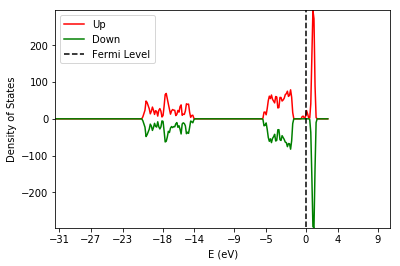

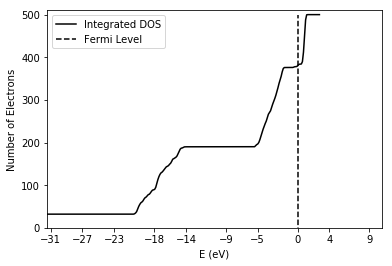

o_cf_5


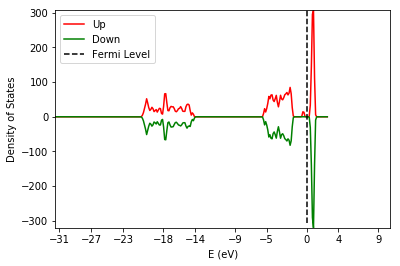

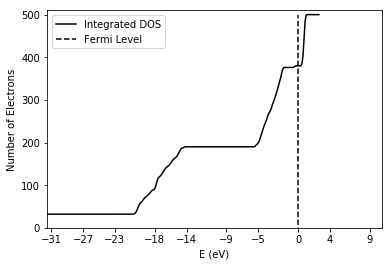

o_cf_9


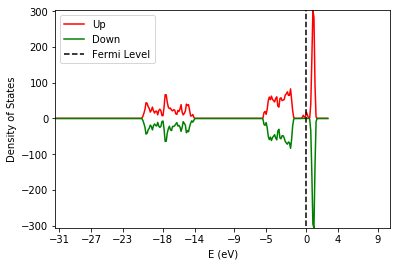

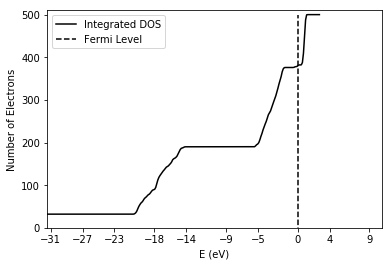

In [16]:
for key in ['o_cf_3','o_cf_5','o_cf_9']:
    from pymatgen.io.vasp.inputs import Incar, Kpoints, Potcar
    path = wd+'struct_opt/o_cf_'+key.split('_')[2]+'/'
    print(key)
    plot_density_of_states(path+'spE/')

# Working on it: Migration Energy: 2 Vacancies 2x2x2

Method isif2 is used to relax the structures. 

Sync command:

    rsync -azPn migration/ tboland1@agave.asu.edu:/scratch/tboland1/2vac/migration/
    
    rsync -azPn --include='KPOINTS' --include='INCAR' --include='*/' --exclude='*' migration/ tboland1@agave.asu.edu:/scratch/tboland1/2vac/migration/
    
    rsync -azPn --include='INCAR' --include='*/' --exclude='*' migration/ tboland1@agave.asu.edu:/scratch/tboland1/2vac/migration/
    
    rsync -azPn --exclude='WAVECAR*' --include='*' tboland1@agave.asu.edu:/scratch/tboland1/2vac/migration/ migration/

In [14]:
# write slurm, POSCAR, INCAR, KPOINTS and POTCAR files ()
for key in config_Struct_dict.keys():
    from pymatgen.io.vasp.inputs import Incar, Kpoints, Potcar
    path = wd+'migration/o_cf_'+key.split('_')[2]+'/'
    try :
        os.makedirs(wd+'migration/o_cf_'+key.split('_')[2])
    except :
        path = path
    
    # create the structure
    struct = config_Struct_dict[key]
    struct.remove_oxidation_states()
    struct.to(filename = path +'POSCAR_init', fmt = 'POSCAR')
    
    
    # create INCAR
    relax_init_incar = Incar.from_file(home+'INCAR')
    relax_init_incar['System'] = "2 vac initial relax "+key
    relax_init_incar['NPAR']   = 2
    relax_init_incar['KPAR']   = 1
    relax_init_incar['ENCUT']  = 520
    relax_init_incar['ISIF']   = 3
    relax_init_incar['EDIFFG'] = -0.01
    relax_init_incar['EDIFF']  = 0.1E-05
    
    ul = [-1]*len(struct.symbol_set)
    uu = [0]*len(struct.symbol_set)
    counter = 0
    for element in list(struct.symbol_set):
        if element == 'Ce':
            ul[counter] = 3    
            uu[counter] = 5 
        counter += 1
    relax_init_incar['LDAUL']  = ul
    relax_init_incar['LDAUU']  = uu
    relax_init_incar['LDAUJ']  = [0]*len(struct.symbol_set)
    
    relax_init_incar.write_file(path+'INCAR')
    
    # create KPOINTS
    kp_file = Kpoints.automatic_density(structure=struct,kppa=50)
    kp_file.write_file(path+'KPOINTS')
    
    # create POTCAR
    potcar = Potcar(symbols=list(struct.symbol_set),
                functional="PBE")
    potcar.write_file(path+'POTCAR')
    
    # slurm for each calc
    with open(path + "parallel.sh", "w") as f:
        f.write(
            "#!/bin/bash\n"
            
            "#SBATCH -J 2vCF" +key.split('_')[2] + " \n"
            
            "#SBATCH -t 0-06:00\n"
            "#SBATCH -n 56\n"
            
            "#SBATCH -q aggressive \n#SBATCH --mem-per-cpu=4000\n"
            "#SBATCH --exclusive\n#SBATCH -o error.%j.out\n"
            
            "cd /scratch/tboland1/2vac/migration/o_cf_"+ key.split('_')[2]+'/' + "\n"
            
            "\nmodule load intel/2018x\nmodule load vasp/5.4.4-elpa\n"
            'export I_MPI_HYDRA_BOOTSTRAP_EXEC_EXTRA_ARGS="--cpu-bind=verbose,none"\n'
            "export I_MPI_HYDRA_BOOTSTRAP=slurm\nexport I_MPI_HYDRA_BOOTSTRAP_EXEC=srun\n\n\n"
            "mpiexec.hydra vasp_gam")

In [ ]:
# high kp rlx ()
for key in config_Struct_dict.keys():
    from pymatgen.io.vasp.inputs import Incar, Kpoints, Potcar
    path = wd+'migration/o_cf_'+key.split('_')[2]+'/'
      
    # create INCAR
    relax_init_incar = Incar.from_file(home+'INCAR')
    relax_init_incar['System'] = "2 vac High KP relax "+key
    relax_init_incar['NPAR']   = 2
    relax_init_incar['KPAR']   = 1
    relax_init_incar['ENCUT']  = 520
    relax_init_incar['ISIF']   = 3
    relax_init_incar['EDIFFG'] = -0.01
    relax_init_incar['EDIFF']  = 0.1E-05
    relax_init_incar['MAGMOM'] = ' '.join(str(el) for el in [2]*32+[0.5]*63)
    relax_init_incar['ISPIN']  = 2
    
    ul = [-1]*len(struct.symbol_set)
    uu = [0]*len(struct.symbol_set)
    counter = 0
    for element in list(struct.symbol_set):
        if element == 'Ce':
            ul[counter] = 3    
            uu[counter] = 5 
        counter += 1
    relax_init_incar['LDAUL']  = ul
    relax_init_incar['LDAUU']  = uu
    relax_init_incar['LDAUJ']  = [0]*len(struct.symbol_set)
    relax_init_incar.write_file(path+'INCAR')
    
    kp_file = Kpoints.automatic_density(structure=struct,kppa=800)
    kp_file.write_file(path+'KPOINTS')       

In [ ]:
# spE ported o_cf_{3,5,9} () 
for key in config_Struct_dict.keys():
    from pymatgen.io.vasp.inputs import Incar, Kpoints, Potcar
    path = wd+'migration/o_cf_'+key.split('_')[2]+'/'
      
    # create INCAR
    relax_init_incar = Incar.from_file(home+'INCAR')
    relax_init_incar['System']= "2 vac spE "+key
    relax_init_incar['NPAR']    = 2
    relax_init_incar['KPAR']    = 1
    relax_init_incar['ENCUT']   = 400
    relax_init_incar['ISIF']    = 2
    relax_init_incar['NSW']     = 0
    relax_init_incar['IBRION']  = -1
    
    relax_init_incar['ISPIN']   = 2
    
    relax_init_incar['EDIFF']   = 0.1E-05
    relax_init_incar.pop('EDIFFG')
    relax_init_incar.pop('POTIM')    
    
    ul = [-1]*len(struct.symbol_set)
    uu = [0]*len(struct.symbol_set)
    counter = 0
    for element in list(struct.symbol_set):
        if element == 'Ce':
            ul[counter] = 3    
            uu[counter] = 5 
        counter += 1
    relax_init_incar['LDAUL']  = ul
    relax_init_incar['LDAUU']  = uu
    relax_init_incar['LDAUJ']  = [0]*len(struct.symbol_set)
    relax_init_incar.write_file(path+'INCAR')
    
    

## Analyzing Migration Energy Isif2

In [ ]:
# final energy ()
for key in ['o_cf_3','o_cf_9','o_cf_5']:
    from pymatgen.io.vasp.inputs import Incar, Kpoints, Potcar
    path = wd+'migration/o_cf_'+key.split('_')[2]+'/'
    E_vac = Oszicar(filename=path + "spE/OSZICAR")
    print("The final energy for config {}"
          " is {:0.2f}".format(key,
              E_vac.final_energy))
    # check the volume change on the final relaxation
    try :
        RlxVolume_init =Poscar.from_file(
            path+'relax-v1/POSCAR').structure.volume
        RlxVolume_final=Poscar.from_file(
            path+'relax-v1/CONTCAR').structure.volume
        print('The percent volume change in final relax is {:0.2f}%.'.format(
            (1-RlxVolume_init/RlxVolume_final)*100))
    except :
        RlxVolume_init =Poscar.from_file(
            path+'relax-v1.1/POSCAR').structure.volume
        RlxVolume_final=Poscar.from_file(
            path+'relax-v1.1/CONTCAR').structure.volume
        print('The percent volume change in final relax is {:0.2f}%.'.format(
            (1-RlxVolume_init/RlxVolume_final)*100))        
    print('The composition is {}'.format(Poscar.from_file(
        path+'spE/POSCAR').structure.composition))    

In [ ]:
for key in ['o_cf_3','o_cf_5','o_cf_9']:
    from pymatgen.io.vasp.inputs import Incar, Kpoints, Potcar
    path = wd+'migration/o_cf_'+key.split('_')[2]+'/'
    plot_density_of_states(path+'spE/')